In [37]:
import pandas as pd
import numpy as np

import boto3
import io

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Create function to load s3 files from AWS
def load_s3_file(file_name, s3, bucket_name, df_name):
    # Downloading the file from S3 and parsing it into a dataframe
    s3.download_file(bucket_name, file_name, file_name)
    
    # Low memory is set to False because columns have mixed data types
    df_name = pd.read_csv(file_name, index_col=False, low_memory=False)
    return df_name 

In [3]:
# Load files from AWS
s3R = boto3.resource("s3")
s3 = boto3.client("s3")
bucket_name = "capstonehaystacks"

# Listing the contents of the S3 bucket
for obj in s3R.Bucket(bucket_name).objects.all():
    print(obj.key)

ACSDP5Y2021.DP04-Data.csv
ACSST5Y2021.S0101-Data.csv
ACSST5Y2021.S0801-Data.csv
ACSST5Y2021.S1901-Data.csv
GA_LISTINGS_SALES.csv
GA_LISTINGS_SALES_V2.csv
GA_listing.csv
POI_second_tab.csv
POI_with_count.csv
all_zips_grocery_store.json
all_zips_restaurant.json
atlanta-geo.csv
atlanta_cbsa_zip.csv
atlanta_hdma_2021.csv
atlanta_hdma_census_2021.csv
atlanta_hdma_tract_2021.csv
atlanta_listings.csv
census_POI_name_binary.csv
census_POI_name_capita.csv
census_POI_name_count.csv
census_all.csv
census_all_perCapita.csv
census_data
core_geo_dataset.csv
crime.csv
crime_rating_zipcode.csv
elementary_schools.csv
ga_georgia_zip_codes_geo.min.json
high_schools.csv
hmda_2017_ga_all-records_labels.csv
hmda_2021_ga_all-records_labels.csv
jason_listing.csv
listing-with-poi-distances.csv
listings_with_tract.csv
middle_schools.csv
poi-google-exploded.csv
poi_combined_haystack.csv
poi_combined_haystack_ALL.csv
poi_combined_haystack_ALL_CLEANED.csv
poi_expanded.csv
points-of-interest-google.csv
points-of-in

In [4]:
# Load S3 files to variables
census = load_s3_file("census_all.csv", s3, bucket_name, df_name="census")
census_capita = load_s3_file("census_all_perCapita.csv", s3, bucket_name, df_name="census_capita")
hdma = load_s3_file("atlanta_hdma_2021.csv", s3, bucket_name, df_name="hdma")
POI = load_s3_file("POI_second_tab.csv", s3, bucket_name, df_name="POI")
census_binary = load_s3_file("census_POI_name_binary.csv", s3, bucket_name, df_name="census_binary")

In [5]:
census_binary

,zipcode,approval_percentage,car_commute,travel_less_10,travel_10_14,travel_15_19,travel_20_24,travel_25_29,travel_30_34,travel_35_44,...,United States Postal Service,Better Homes and Gardens Real Estate Metro Brokers,T.J. Maxx,Marco's Pizza,Zoës Kitchen,Coin Laundry,Marlow's Tavern,Labcorp,Texaco,Havoline xpress lube
0,30002,87.51,77.1,5.1,9.6,14.1,15.7,3.6,24.0,10.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30004,90.60,75.4,10.6,11.9,14.7,15.3,3.1,9.8,7.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30005,91.29,71.2,8.8,15.0,13.6,16.9,4.2,11.1,6.6,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30008,85.11,83.3,5.6,6.0,13.6,20.3,4.9,22.8,7.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30009,90.17,65.5,14.7,16.1,16.4,12.7,4.3,8.9,2.9,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,31085,85.89,88.8,9.7,7.0,3.8,10.6,3.2,22.2,5.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,31097,82.16,94.6,11.2,6.4,19.5,24.9,2.4,13.7,2.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,31816,75.15,89.8,25.8,14.5,5.2,2.8,2.6,5.9,16.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,31822,81.78,91.8,11.6,9.4,10.2,13.7,7.4,24.5,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
census_binary.columns.get_loc('population')

41

In [7]:
pd.set_option('display.max_columns', None)
temp = census_binary.corr().iloc[1:42,42:]

In [8]:
temp.head()

,Pro Desk at The Home Depot,The Honey Baked Ham Company,Verizon,Newk's Eatery,Zaxby's Chicken Fingers & Buffalo Wings,Piggly Wiggly,LensCrafters,Frontera Mex-Mex Grill,Badcock Home Furniture &more,Rainbow Shops,76,Cricket Wireless Authorized Retailer,Bank of America Financial Center,Atlanta Oral & Facial Surgery,Ryder Truck Rental,Domino's Pizza,Costco Wholesale,Discount Tire,Bath & Body Works,Physio,The Juicy Crab,Dairy Queen Grill & Chill,Wellstar Urgent Care,Express Oil Change & Tire Engineers,Brazilian Wax by Andreia,Meineke Car Care Center,DEKRA Emission Check,Shoe Show,Golden Krust Caribbean Restaurant,Synovus Bank,Taco Bell,Budget Truck Rental,Moe's Southwest Grill,Your Pie Pizza,Baskin-Robbins,Burn Boot Camp,Aspen Dental,Penske Truck Rental,Metro by T-Mobile,Anytime Fitness,Delta Community Credit Union,Sprouts Farmers Market,PetSmart,Angie's Beauty Supply,Advance Auto Parts,Sam's Club,Office Depot,Food Depot,Atlanta Gastroenterology Associates,America's Best Contacts & Eyeglasses,Aaron's,Bojangles,Party City,Liberty Tax Service,Batteries Plus Bulbs,GNC,Lidl,Budget Car Rental,Walgreens Photo,Walmart Photo Center,Best Buy,Dunkin',SecurCare Self Storage,Olive Garden Italian Restaurant,Firestone Complete Auto Care,Cash America Pawn,China Express,Willy's Mexicana Grill,Leslie's,Dollar Tree,China Wok,Petco,KeyMe Locksmiths,Family Dollar,Bank of America (with Drive-thru ATM),Tidal Wave Auto Spa,Massage Envy,Tool & Truck Rental Center at The Home Depot,Mister Car Wash,Pita Mediterranean Street Food,ACE Cash Express,OneMain Financial,Golden Corral Buffet & Grill,Shane's Rib Shack,Piedmont Orthopedics | OrthoAtlanta,Rite Aid,Petco Dog Grooming,QuikTrip,Little Caesars Pizza,The Joint Chiropractic,Tires Plus,Verizon Authorized Retailer - TCC,North Atlanta Primary Care,SunTrust,GameStop,Calvary Baptist Church,Northwest Exterminating,BB&T,Merle Norman Cosmetic Studio,Ingles Gas Express,Chicken Salad Chick,Kroger Fuel Center,Atlanta Allergy & Asthma,AutoZone Auto Parts,Smoothie King,The Vitamin Shoppe,CubeSmart Self Storage,KFC,Outback Steakhouse,Extra Space Storage,Hertz,BP,Blimpie America's Sub Shop,Public Storage,The Home Depot,MyEyeDr.,Cook Out,JCPenney,Chili's Grill & Bar,Circle K,ChargePoint Charging Station,Johnny's New York Style Pizza,Cracker Barrel Old Country Store,TitleMax Title Pawns,Ted's Montana Grill,Farmers Home Furniture,Red Lobster,CITGO,Valvoline Instant Oil Change,Caliber Collision,Ollie's Bargain Outlet,Lowe's Garden Center,Gerber Collision & Glass,Boost Mobile,Five Guys,Pet Supermarket,Auntie Anne's,O'Charley’s Restaurant & Bar,Murphy USA,Panera Bread,Ameris Bank,Flash Foods,Dollar General,Krispy Kreme,Kroger Deli,Quality Inn,Michaels,MinuteClinic,Edible Arrangements,Planet Smoothie,Enterprise Rent-A-Car,Marathon Gas,Redbox,Barnes & Noble,My Eyelab,Krystal,Ingles Markets,Burger King,Walmart Auto Care Centers,Georgia Farm Bureau,AICA Orthopedics,McAlister's Deli,Regions Bank,Avis Car Rental,Target,Waffle House,Starbucks,Sally Beauty,MoneyGram,Valero,J. Christopher's,Bank of America (with Drive-thru services),"Regal Nails, Salon & Spa",Midas,Sonic Drive-In,Old Navy - with Curbside Pickup,Georgia MV Express Tag Kiosk,Walgreens Pharmacy,Social Security Administration - Phone Service Only,CVS Pharmacy,Velox® Insurance,First Baptist Church,Ross Dress for Less,LA Fitness,Marshalls,CVS,Ruby Tuesday,SmartStyle Hair Salon,Western Union,Buffalo Wild Wings,Steak 'n Shake,Citi Trends,Take 5 Oil Change,Jiffy Lube,Hibbett Sports,Mavis Tires & Brakes,Kroger Pharmacy,Walgreens,Two Men and a Truck,Checkers,Palm Beach Tan,Loya Insurance Company,Bealls Outlet,Metro Self Storage,Garden Center at The Home Depot,Kroger Bakery,Orkin,PNC Bank,Compass Self Storage,Ulta Beauty,The Original Mattress Factory,Vulcan Materials Company,Gwinnett Clinic,Tropical Smoothie Cafe,Citgo,bp,Maaco Auto Body Shop & Painting,Jimmy John's,IHOP,Wells Fargo Bank,AAMCO Transmissions & Total Car Care,LongHorn Steakhouse,FedEx OnSite,Nothing Bundt Cakes,First

In [9]:
any(temp[abs(temp['Pro Desk at The Home Depot'])>.1])

True

In [10]:
temp.columns

Index(['Pro Desk at The Home Depot', 'The Honey Baked Ham Company', 'Verizon',
       'Newk's Eatery', 'Zaxby's Chicken Fingers & Buffalo Wings',
       'Piggly Wiggly', 'LensCrafters', 'Frontera Mex-Mex Grill',
       'Badcock Home Furniture &more', 'Rainbow Shops',
       ...
       'United States Postal Service',
       'Better Homes and Gardens Real Estate Metro Brokers', 'T.J. Maxx',
       'Marco's Pizza', 'Zoës Kitchen', 'Coin Laundry', 'Marlow's Tavern',
       'Labcorp', 'Texaco', 'Havoline xpress lube'],
      dtype='object', length=363)

In [11]:
my_list = []
threshold = .5

for i in temp.columns.tolist():
    if any(abs(temp[i])>threshold):
        my_list.append(i)


In [12]:
my_list

["Dunkin'",
 'QuikTrip',
 'Dollar General',
 'Starbucks',
 'T-Mobile',
 'Hollywood Feed',
 'Kroger',
 'The UPS Store']

In [13]:
len(my_list)

8

In [15]:
my_df = pd.DataFrame()

for i in my_list:
    filtered_values = temp[abs(temp[i]) > 0.25][i].sort_values(ascending=False)
    my_df = my_df.append(filtered_values)




/var/folders/_j/zgrrpz8955l530bsdd3qxdq80000gp/T/ipykernel_9572/2721793296.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df.append(filtered_values)
/var/folders/_j/zgrrpz8955l530bsdd3qxdq80000gp/T/ipykernel_9572/2721793296.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df.append(filtered_values)
/var/folders/_j/zgrrpz8955l530bsdd3qxdq80000gp/T/ipykernel_9572/2721793296.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df.append(filtered_values)
/var/folders/_j/zgrrpz8955l530bsdd3qxdq80000gp/T/ipykernel_9572/2721793296.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df.append(f

In [16]:
my_df_trans = my_df.transpose()

In [17]:
my_df

,rent_1000_2500,median_rental_value,percent_after_2019,rental_vacancy_rate,percent_25_39,travel_35_44,percent_10k_15k,percent_over_60,rent_less_999,approval_percentage,car_commute,gross_rental_yield,median_homeowner_value,percent_150k_200k,percent_25k_35k,percent_35k_50k,percent_50k_75k,percent_more_200k,rent_over_2500,travel_15_19,travel_20_24,travel_more_60,percent_15k_25k,percent_owner_occupied,population
Dunkin',0.510902,0.440162,0.267476,0.258302,0.254387,0.250456,-0.272503,-0.314953,-0.494205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QuikTrip,0.517335,0.414363,NaN,NaN,NaN,NaN,-0.291404,-0.287776,-0.500703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dollar General,-0.259644,-0.445393,-0.354679,NaN,NaN,NaN,NaN,NaN,0.316296,-0.339027,0.478641,0.383019,-0.584944,-0.267367,0.290380,0.396773,0.337794,-0.575246,-0.503474,-0.27964,-0.252719,0.427969,NaN,NaN,NaN
Starbucks,0.515906,0.572680,0.360104,0.343243,NaN,NaN,-0.259015,NaN,-0.533531,0.314588,-0.323470,NaN,0.428264,0.308319,-0.305815,-0.279748,NaN,0.427381,0.309203,NaN,NaN,NaN,-0.280173,NaN,NaN
T-Mobile,0.556728,0.500128,0.330240,0.317835,0.288731,NaN,-0.283511,-0.314428,-0.541807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.27196,0.260071
Hollywood Feed,0.300155,0.391323,NaN,NaN,NaN,NaN,NaN,NaN,-0.324938,0.296339,-0.256622,-0.274521,0.458856,0.286841,NaN,-0.250545,-0.277706,0.514674,0.286262,NaN,NaN,NaN,NaN,NaN,NaN
Kroger,0.507328,0.474763,NaN,0.336509,NaN,NaN,NaN,NaN,-0.502734,NaN,NaN,NaN,0.265667,NaN,NaN,NaN,NaN,0.269657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The UPS Store,0.491055,0.523792,0.290837,0.289291,NaN,NaN,NaN,NaN,-0.500789,0.306741,-0.296839,NaN,0.407881,0.382748,-0.299568,-0.270342,NaN,0.419957,NaN,NaN,NaN,NaN,-0.277796,NaN,NaN


In [18]:
my_df_trans

,Dunkin',QuikTrip,Dollar General,Starbucks,T-Mobile,Hollywood Feed,Kroger,The UPS Store
rent_1000_2500,0.510902,0.517335,-0.259644,0.515906,0.556728,0.300155,0.507328,0.491055
median_rental_value,0.440162,0.414363,-0.445393,0.572680,0.500128,0.391323,0.474763,0.523792
percent_after_2019,0.267476,NaN,-0.354679,0.360104,0.330240,NaN,NaN,0.290837
rental_vacancy_rate,0.258302,NaN,NaN,0.343243,0.317835,NaN,0.336509,0.289291
percent_25_39,0.254387,NaN,NaN,NaN,0.288731,NaN,NaN,NaN
travel_35_44,0.250456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_10k_15k,-0.272503,-0.291404,NaN,-0.259015,-0.283511,NaN,NaN,NaN
percent_over_60,-0.314953,-0.287776,NaN,NaN,-0.314428,NaN,NaN,NaN
rent_less_999,-0.494205,-0.500703,0.316296,-0.533531,-0.541807,-0.324938,-0.502734,-0.500789
approval_percentage,NaN,NaN,-0.339027,0.314588,NaN,0.296339,NaN,0.306741


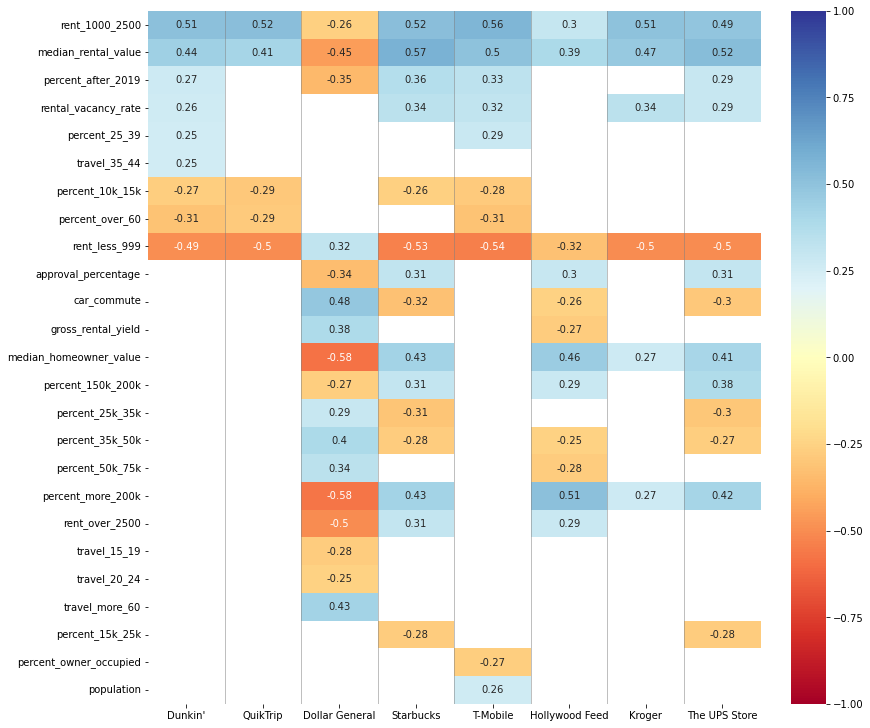

In [38]:


# Generate the heatmap plot
plt.figure(figsize=(12, 10), constrained_layout=True)
sns.heatmap(my_df_trans, annot=True, cmap="RdYlBu", vmin=-1, vmax=1)

# Add vertical lines
for i in range(1,len(my_df_trans.columns)):
    plt.axvline(x=i, color='grey', linewidth=1, alpha=.5)

# Save and display the plot
plt.savefig('../visuals/poi_corr.png', dpi=900)
plt.show()


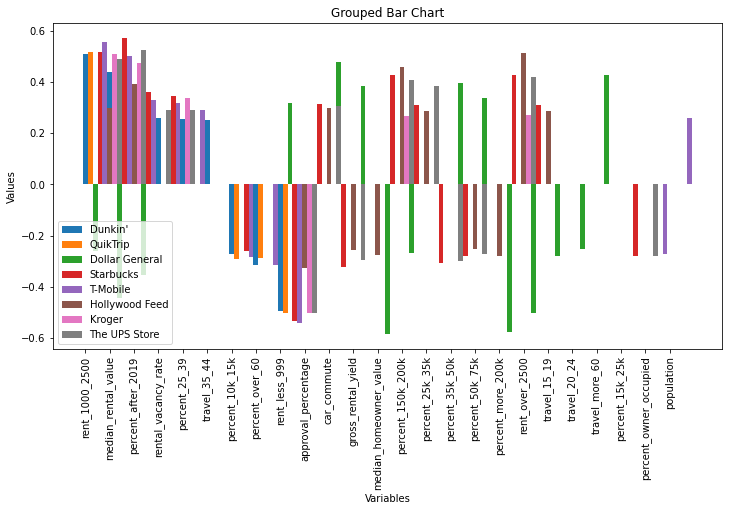

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the variables and categories for the grouped bar chart
variables = my_df.columns
categories = my_df.index

# Set the width of each bar
bar_width = 0.2

# Calculate the positions of the bars on the x-axis
x = np.arange(len(variables))

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as per your preference

for i, category in enumerate(categories):
    plt.bar(x + (i * bar_width), my_df.loc[category], width=bar_width, label=category)

# Customize the plot
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Grouped Bar Chart')
plt.xticks(x, variables, rotation=90)  # Set x-axis labels
plt.legend()

# Display the plot
plt.show()
